<a href="https://colab.research.google.com/github/Anjali-042/ML_LAB/blob/main/1BM22CS042_LAB_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
np.random.seed(42)
n_samples = 100000

data = {
    'age': np.random.randint(18, 70, n_samples),
    'job_type': np.random.choice(['employed', 'self-employed', 'unemployed'], n_samples, p=[0.6, 0.3, 0.1]),
    'income_level': np.random.normal(50000, 20000, n_samples).round(2),
    'credit_history': np.random.uniform(300, 850, n_samples).round(2),
    'loan_amount': np.random.randint(1000, 50000, n_samples)
}

df = pd.DataFrame(data)


df['credit_history'] = np.clip(df['credit_history'] + (df['income_level'] - 50000) * 0.001, 300, 850).round(2)
df['loan_amount'] = np.clip(df['loan_amount'] + (df['age'] - 40) * 100, 1000, 100000)
df.to_csv('loan.csv', index=False)

mean_loan_amount = df['loan_amount'].mean()
print("\nMean Loan Amount:", mean_loan_amount)


employed_loans = df[df['job_type'] == 'employed']
print("\nLoans for Employed Individuals:")
print(employed_loans.head())



Mean Loan Amount: 25929.61097

Loans for Employed Individuals:
   age  job_type  income_level  credit_history  loan_amount
1   69  employed      45524.72          803.30        19343
2   46  employed      49525.26          748.07        41637
3   32  employed      36864.43          301.10        26460
4   60  employed      25683.57          516.63         3537
5   25  employed      69977.25          384.87         7131


<ipython-input-21-76443febd1ab>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['job_type'] = le.fit_transform(X['job_type'])


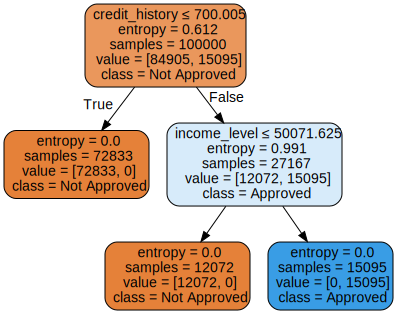

In [21]:


!pip install scikit-learn graphviz
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
import graphviz

df = pd.read_csv('loan.csv')
average_income = df['income_level'].mean()
df['loan_approved'] = ((df['credit_history'] > 700) & (df['income_level'] > average_income)).astype(int)

features = ['age', 'job_type', 'income_level', 'credit_history', 'loan_amount']
X = df[features]
y = df['loan_approved']


le = LabelEncoder()
X['job_type'] = le.fit_transform(X['job_type'])


model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X, y)

dot_data = export_graphviz(model, out_file=None,
                           feature_names=features,
                           class_names=['Not Approved', 'Approved'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph




In [22]:

dt_model = DecisionTreeClassifier(random_state=42)


dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nAccuracy of Decision Tree Model: {accuracy_dt:.4f}")


Accuracy of Decision Tree Model: 1.0000


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of Random Forest Model: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of Random Forest Model: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16971
           1       1.00      1.00      1.00      3029

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [25]:

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=42, solver='liblinear')

log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"\nAccuracy of Logistic Regression Model: {accuracy_log:.4f}")

print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log))



Accuracy of Logistic Regression Model: 0.8415

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     16971
           1       0.43      0.14      0.21      3029

    accuracy                           0.84     20000
   macro avg       0.65      0.55      0.56     20000
weighted avg       0.80      0.84      0.81     20000



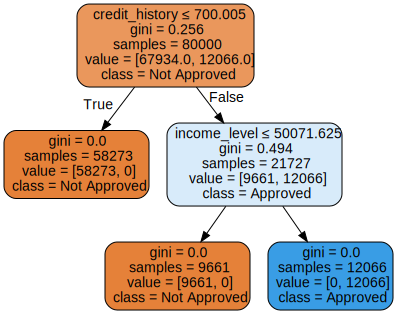

In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=10, random_state=42)
model.fit(X_train, y_train)

dot_data = export_graphviz(model, out_file=None,
                           feature_names=features,
                           class_names=['Not Approved', 'Approved'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph